In [56]:
# name -> number definitions
tl_pool = [64, 256, 2048]
bs_pool = [4,8,16]
al_pool = [1.1, 1.15, 1.20, 1.25]
al_string_pool = ["1.10", "1.15", "1.20", "1.25"]
cap_pool = [1, 1000000]
data_from_index_array = []

def build_data_from_index() :
    global data_from_index_array
    data_from_index_array[:] = []
    for tl in tl_pool :
        for bs in bs_pool :
            for al in range(len(al_pool)) :
                for cap in cap_pool :
                    name = "_TL" + str(tl) + "BS" + str(bs) + 
                           "_al" + al_string_pool[al] + "_cap" + str(cap)
                    data_from_index_array.append((name, tl, bs, al_pool[al], cap))

def get_index (tl, bsize, alpha, cap) :
    temp  = 0
    block0 = len(bs_pool) * len(al_pool) * len(cap_pool)
    block1 = len(al_pool) * len(cap_pool)
    block2 = len(cap_pool)
    
    for ttl in tl_pool :
        if (ttl == tl) :
            for tbs in bs_pool :
                if (tbs == bsize) :
                    for tal in al_pool :
                        if (tal == alpha) :
                            for tcap in cap_pool :
                                if (tcap == cap) :
                                    return temp;
                                else : temp += 1;
                        else : temp += block2;
                else : temp += block1;
        else : temp += block0;
    return 6666666666        
    

def get_data_from_index( idx ) :
    return data_from_index_array[ idx ];

def n_tests() :
    return len(data_from_index_array)


In [57]:
import pandas as pd
from os import walk

def load_hist(file, col) :
    return pd.read_csv(file, sep = '\\s+', names = col,
                      skiprows = 1, comment = '#', skip_blank_lines = True)

columns = ["bla", "blub"]

folder = "../out/"
suffix = ".hist"

build_data_from_index()
print n_tests()

bfs = []
rwalk = []
rwalkcyc = []

for idx in range(n_tests()) :
    name = get_data_from_index( idx )[0]
    bfs.append(load_hist(folder+"bfs"+name+suffix, columns))
    rwalk.append(load_hist(folder+"rwalk"+name+suffix, columns))
    rwalkcyc.append(load_hist(folder+"rwalkcyc"+name+suffix, columns))
  
    
#for name in f :
#    print name
#    list.append((name, load_hist(folder+name, columns)))

#print list[0]
    #print list[0]
#print bfs[0]

36


In [58]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline 

def plot (ax, data, name) :
    ax.plot(data['bla'], data['blub'], label=name)
    
def plot_t (ax, data, name) :
    ax.plot(data['bla'], data['blub'], label=name, color=(0.9,0.9,0.9))

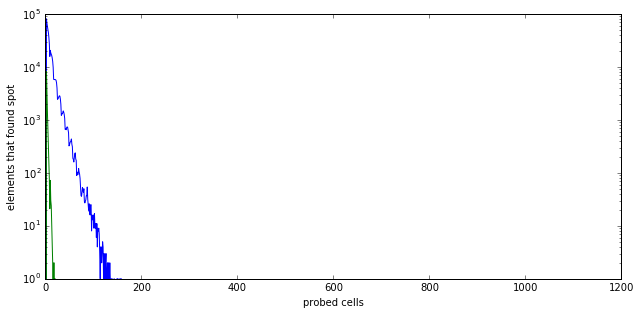

In [76]:
fig = plt.figure( figsize=(10,4.6) )
ax  = fig.add_axes( [0.1, 0.15, 0.8, 0.8] )

for idx in range(n_tests()) :
    (name, tl, bs, al, cap) = get_data_from_index( idx )
    if ( (al == 1.1) & (bs == 8) & (tl == 256) & (cap == 1)) :
        plot(ax, bfs[idx], name)
    if ( (al == 1.1) & (bs == 8) & (tl == 256) & (cap == 1000000)) :
        plot(ax, bfs[idx], name)
    #else :
        #plot_t(ax, bfs[idx], '')
    
ax.set_yscale ("log")
    
ax.legend(loc=0, ncol=2)
ax.set_xlabel('probed cells')
ax.set_ylabel('elements that found spot')

plt.show()